## KPI REQUIREMENTS
**Total Sales** - Overall revenue generated from all items sold <br>
**Average Sales** - Average revenue per sale <br>
**Number of Items** - Total count of different items sold <br>
**Average Rating** - Average customer rating for items sold <br>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv("blinkit_data.csv")
df.head(5)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [3]:
df.shape

(8523, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

**Data Cleaning**

In [6]:
df['Item Fat Content'].unique()

array(['Regular', 'Low Fat', 'low fat', 'LF', 'reg'], dtype=object)

In [7]:
df['Item Fat Content'] = df['Item Fat Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': "Regular"})

In [8]:
df['Item Fat Content'].unique()

array(['Regular', 'Low Fat'], dtype=object)

**KPIs**

In [9]:
# Total Sales
total_sales = df['Sales'].sum()

# Average Sales
avg_sales = df['Sales'].mean()

# No of items sold
no_of_items_sold = df['Sales'].count()

# Average Rating
avg_rating = df['Rating'].mean()

print(f'Total Sales: ${total_sales: .2f}')
print(f'Average Sales: ${avg_sales: .2f}')
print(f'Total number of items sold: {no_of_items_sold: .0f}')
print(f'Average Rating: {avg_rating: .2f}')

Total Sales: $ 1201681.48
Average Sales: $ 140.99
Total number of items sold:  8523
Average Rating:  3.97


## Important Questions

### What is the affect of amount of fat present in food on sales?

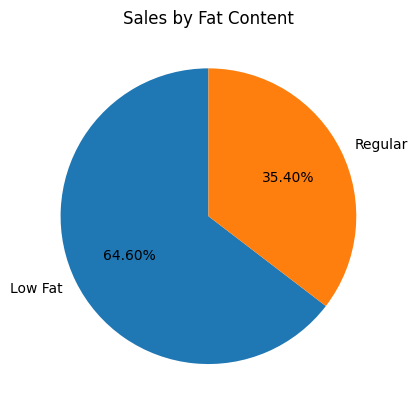

In [10]:
sales_by_fat = df.groupby('Item Fat Content')['Sales'].sum()

plt.pie(sales_by_fat, labels = sales_by_fat.index, autopct = '%.2f%%', startangle = 90)
plt.title('Sales by Fat Content')
plt.show()

### Which item types generate the highest sales across all outlets?

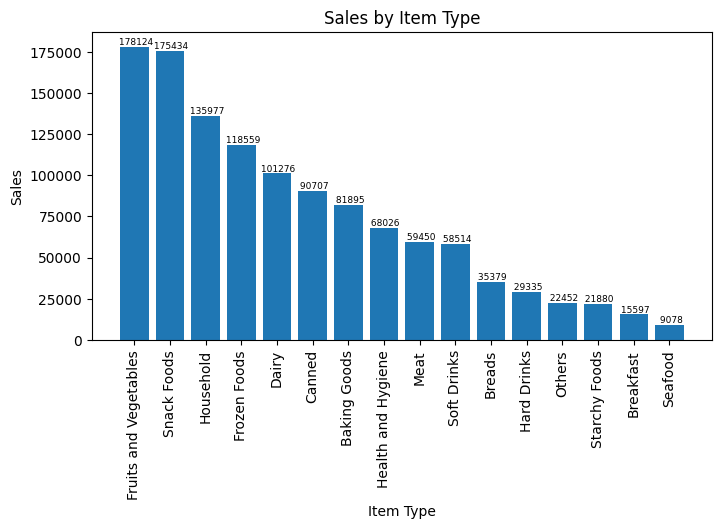

In [11]:
sales_by_item_type = df.groupby('Item Type')['Sales'].sum().sort_values(ascending = False)

plt.figure(figsize = (8, 4))
bars = plt.bar(sales_by_item_type.index, sales_by_item_type.values)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Item Type')
plt.ylabel('Sales')
plt.title("Sales by Item Type")
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height(): .0f}', ha='center', va='bottom', fontsize=6.5)
plt.show()

### How does item fat content (e.g., Regular vs. Low Fat) affect sales across item types?

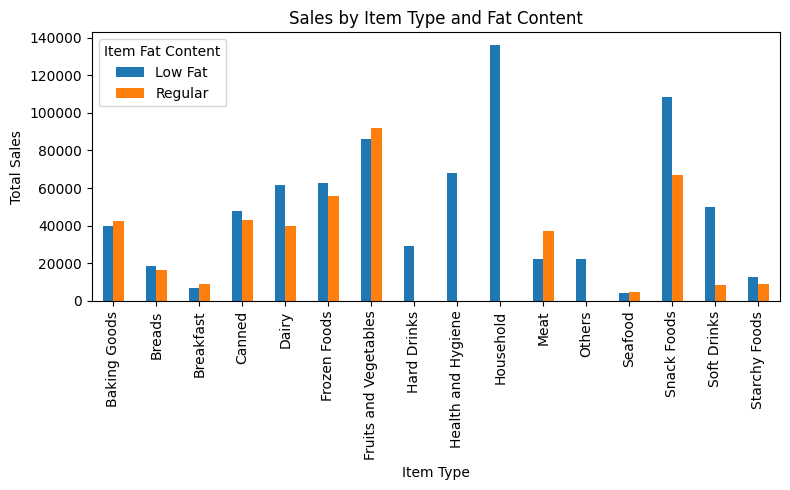

In [ ]:
grouped = df.groupby(['Item Type', 'Item Fat Content'])['Sales'].sum().unstack()

ax = grouped.plot(kind='bar', figsize=(8,5), title='Sales by Item Type and Fat Content')
plt.xlabel('Item Type')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.ylabel('Total Sales')
plt.legend(title='Item Fat Content')
plt.tight_layout()
plt.show()

### Are newer outlets performing better or worse than older ones?

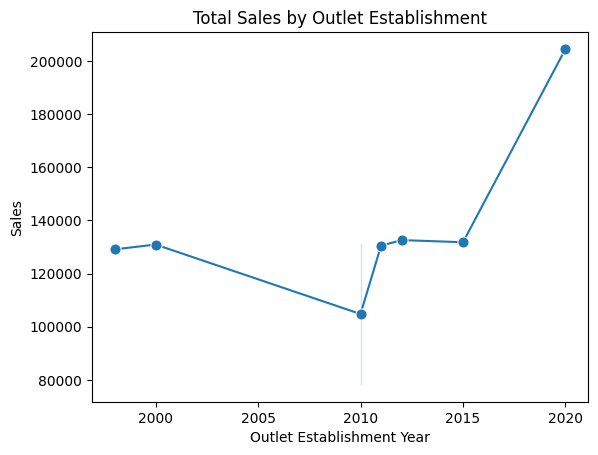

In [13]:
establishment_sales = df.groupby('Outlet Establishment Year')['Sales'].sum().sort_index()

sns.lineplot(x=df['Outlet Establishment Year'], y=establishment_sales, marker='o', markersize=8)
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Sales')
plt.title('Total Sales by Outlet Establishment')
plt.show()

### How does outlet type or size influence sales performance?

**Sales by Outlet Size**

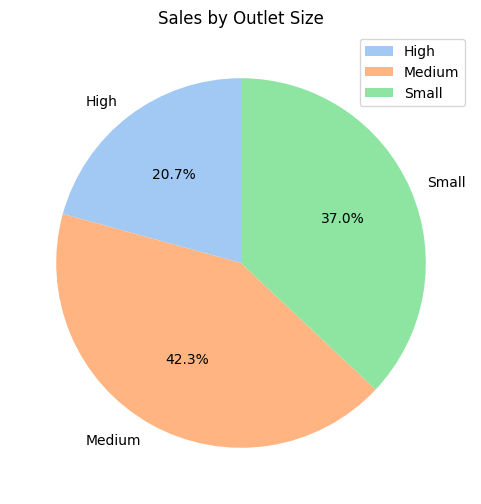

In [14]:
establishment_size_sales = df.groupby('Outlet Size')['Sales'].sum()

plt.figure(figsize=(6,6))
plt.pie(establishment_size_sales, labels=establishment_size_sales.index, colors=sns.color_palette('pastel'), autopct='%.1f%%', startangle=90)
plt.title('Sales by Outlet Size')
plt.legend(establishment_size_sales.index)
plt.show()

**Sales by Outlet Type**

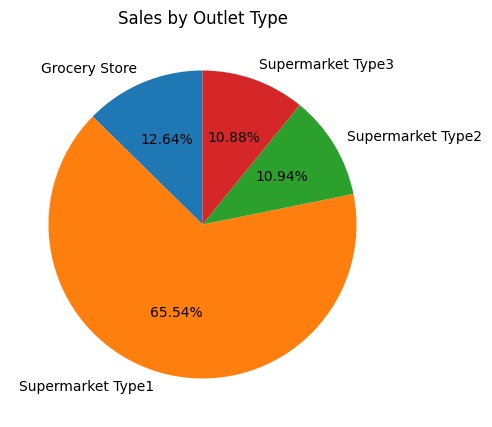

In [54]:
outlet_type_sales = df.groupby('Outlet Type')['Sales'].sum()

plt.figure(figsize=(8,5))
plt.pie(outlet_type_sales, labels=outlet_type_sales.index, autopct='%.2f%%', startangle=90)
plt.title('Sales by Outlet Type')
plt.show()

### Do certain outlet locations (Tier 1, Tier 2, Tier 3) see higher average sales?

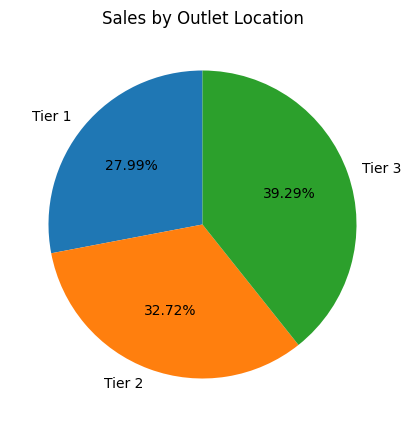

In [53]:
location_sales = df.groupby('Outlet Location Type')['Sales'].sum()

plt.figure(figsize=(8,5))
plt.pie(location_sales, labels=location_sales.index, autopct='%.2f%%', startangle=90)
plt.title('Sales by Outlet Location')
plt.show()

### Does item weight have any correlation with sales?

In [66]:
item_weight_sales_correlation = df[['Item Weight', 'Sales']].corr().iloc[0, 1]
print(f'Correlation between Item Weight and Sales: {item_weight_sales_correlation:.2f}')

Correlation between Item Weight and Sales: 0.03


### Which combination of outlet size and type yields the best sales results?

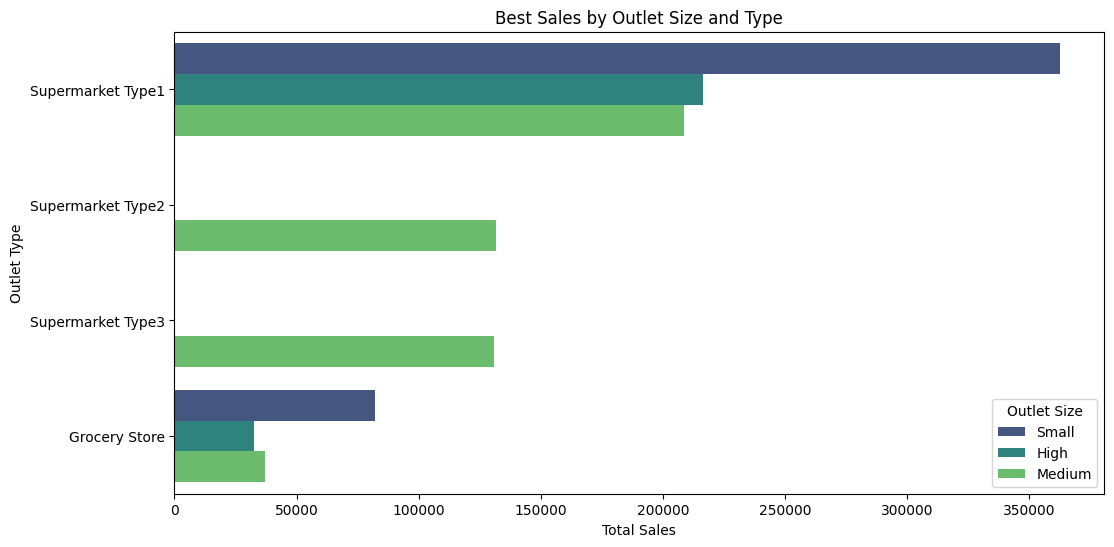

In [68]:
outlet_sales = df.groupby(['Outlet Size', 'Outlet Type'])['Sales'].sum().reset_index()
outlet_sales_sorted = outlet_sales.sort_values(by='Sales', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Sales', y='Outlet Type', hue='Outlet Size', data=outlet_sales_sorted, palette='viridis')
plt.title('Best Sales by Outlet Size and Type')
plt.xlabel('Total Sales')
plt.ylabel('Outlet Type')
plt.show()